In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
# Read in the data
df = pd.read_excel("Absenteeism_at_work.xls")
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


***Clean & Wrangle the Data***

In [54]:
# Get list of column names
list(df.columns)

['ID',
 'Reason for absence',
 'Month of absence',
 'Day of the week',
 'Seasons',
 'Transportation expense',
 'Distance from Residence to Work',
 'Service time',
 'Age',
 'Work load Average/day ',
 'Hit target',
 'Disciplinary failure',
 'Education',
 'Son',
 'Social drinker',
 'Social smoker',
 'Pet',
 'Weight',
 'Height',
 'Body mass index',
 'Absenteeism time in hours']

In [55]:
# rename the columns for ease of use
df.columns = ['id', 'reason', 'month', 'weekday', 'season', 'trans_expense', 'distance', 'service_time', 'age', 'workload', 
            'hit_target', 'discipline_fail', 'education', 'children', 'drinker', 'smoker', 'pet', 'weight', 'height', 
            'bmi', 'hrs_absent']
df.head()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,...,discipline_fail,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [56]:
df.describe()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,...,discipline_fail,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [57]:
# Remove all rows with 0 hrs_absent
df = df[df.hrs_absent != 0]

# Rows with 0 hours absent were the only rows that had 1 for disciplinary failure, so remove that row, it provides no value
df = df.drop(['discipline_fail'], axis=1)

# reindex dataset
df.reset_index()

,index,id,reason,month,weekday,season,trans_expense,distance,service_time,age,...,hit_target,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent
0,0,11,26,7,3,1,289,36,13,33,...,97,1,2,1,0,1,90,172,30,4
1,2,3,23,7,4,1,179,51,18,38,...,97,1,0,1,0,0,89,170,31,2
2,3,7,7,7,5,1,279,5,14,39,...,97,1,2,1,1,0,68,168,24,4
3,4,11,23,7,5,1,289,36,13,33,...,97,1,2,1,0,1,90,172,30,2
4,5,3,23,7,6,1,179,51,18,38,...,97,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,732,10,22,7,4,1,361,52,3,28,...,93,1,1,1,0,4,80,172,27,8
692,733,28,22,7,4,1,225,26,9,28,...,93,1,1,0,0,2,69,169,24,8
693,734,13,13,7,2,1,369,17,12,31,...,93,1,3,1,0,0,70,169,25,80
694,735,11,14,7,3,1,289,36,13,33,...,93,1,2,1,0,1,90,172,30,8


In [58]:
# Change the weight column from kilograms to pounds
df['weight'] = df['weight'].apply(lambda x: x * 2.2).round().astype(int)

# Change the height column from centimeters to inches
df['height'] = df['height'].apply(lambda x: x * 0.393701).round().astype(int)

df.head()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,hit_target,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent
0,11,26,7,3,1,289,36,13,33,239554,97,1,2,1,0,1,198,68,30,4
2,3,23,7,4,1,179,51,18,38,239554,97,1,0,1,0,0,196,67,31,2
3,7,7,7,5,1,279,5,14,39,239554,97,1,2,1,1,0,150,66,24,4
4,11,23,7,5,1,289,36,13,33,239554,97,1,2,1,0,1,198,68,30,2
5,3,23,7,6,1,179,51,18,38,239554,97,1,0,1,0,0,196,67,31,2


In [59]:
# Add an events column to be used to calculate up how many absence events a person has taken
df['events'] = 1
df.head()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,...,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent,events
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,198,68,30,4,1
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,196,67,31,2,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,150,66,24,4,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,198,68,30,2,1
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,196,67,31,2,1


***Exploratory Data Analysis***

In [60]:
# Because an id (person) can appear multiple times in the df, take a look at each persons absence info
absence_by_id = df.groupby(by=['id'], as_index=False)['hrs_absent', 'events'].sum()
absence_by_id

<ipython-input-60-3469fd045c13>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  absence_by_id = df.groupby(by=['id'], as_index=False)['hrs_absent', 'events'].sum()


,id,hrs_absent,events
0,1,121,22
1,2,25,4
2,3,482,112
3,5,104,14
4,6,72,8
5,7,30,4
6,9,262,8
7,10,186,24
8,11,450,38
9,12,34,7


In [61]:
# Look at the means
print(absence_by_id['hrs_absent'].mean())
print(absence_by_id['events'].mean())

155.27272727272728
21.09090909090909


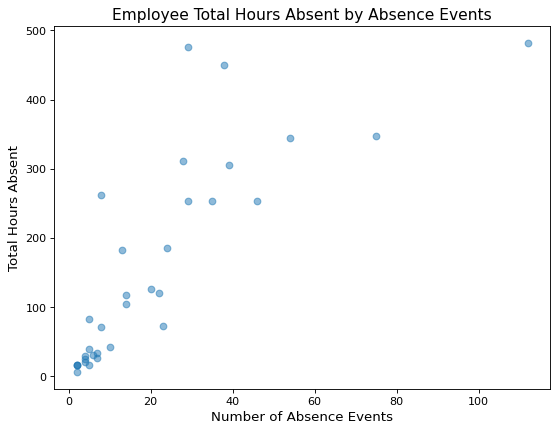

In [62]:
# Change figure size
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# Plot events by hrs absent
plt.scatter( absence_by_id.events, absence_by_id.hrs_absent, alpha=0.5)
plt.title('Employee Total Hours Absent by Absence Events', fontsize=14)
plt.xlabel('Number of Absence Events', fontsize=12)
plt.ylabel('Total Hours Absent', fontsize=12)
plt.show()

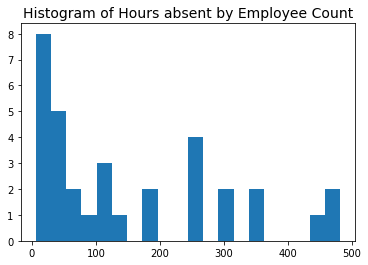

In [63]:
# It's obvious that the data is highly skewed by a few individuals with high events and high hrs_absent. 
# View the histogram for these columns

plt.hist(absence_by_id['hrs_absent'], bins=20)
plt.title('Histogram of Hours absent by Employee Count', fontsize=14)
plt.show()

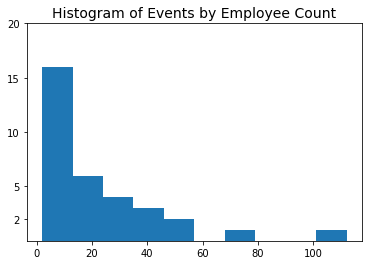

In [64]:
plt.hist(absence_by_id['events'], bins=10)
plt.title('Histogram of Events by Employee Count', fontsize=14)
plt.yticks([2, 5, 10, 15, 20])  ###Check that this looks okay after running, added after the fact
plt.show()

In [65]:
absence_by_season = df.groupby(by=['season'], as_index=False)['hrs_absent', 'events'].sum()
absence_by_season

<ipython-input-65-3ae1fdaaf910>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  absence_by_season = df.groupby(by=['season'], as_index=False)['hrs_absent', 'events'].sum()


,season,hrs_absent,events
0,1,1241,164
1,2,1152,189
2,3,1492,169
3,4,1239,174


Text(0.5, 1.0, 'Total Hours Absent by Season')

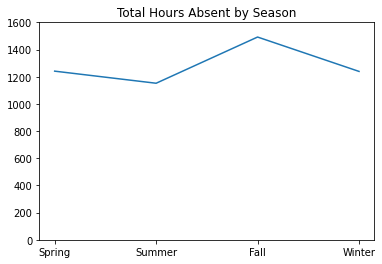

In [66]:
plt.plot(absence_by_season.season, absence_by_season.hrs_absent)
plt.ylim(0, 1600)
plt.xticks([1.0,2.0,3.0,4.0], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title("Total Hours Absent by Season")

Text(0.5, 1.0, 'Total Absence Events by Season')

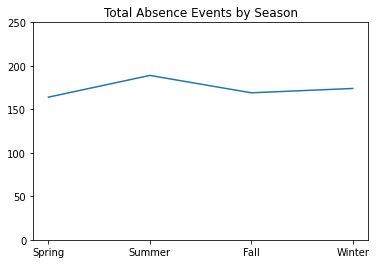

In [67]:
plt.plot(absence_by_season.season, absence_by_season.events)
plt.ylim(0, 250)
plt.xticks([1.0,2.0,3.0,4.0], ['Spring', 'Summer', 'Fall', 'Winter'])
plt.title("Total Absence Events by Season")

In [68]:
absence_by_month = df.groupby(by=['month'], as_index=False)['hrs_absent', 'events'].sum()
absence_by_month

<ipython-input-68-1e8ce37c8c18>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  absence_by_month = df.groupby(by=['month'], as_index=False)['hrs_absent', 'events'].sum()


,month,hrs_absent,events
0,1,222,49
1,2,294,72
2,3,765,83
3,4,482,52
4,5,400,58
5,6,411,51
6,7,734,65
7,8,288,54
8,9,292,44
9,10,349,62


<ipython-input-69-6e33089fea9c>:6: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Total Absentee Hours by Month", Fontsize=14)


Text(0, 0.5, 'Total Absentee Hours')

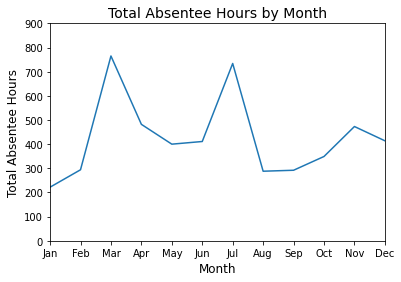

In [69]:
plt.plot(absence_by_month.month, absence_by_month.hrs_absent)
plt.ylim(0, 900)
plt.xlim(1, 12)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 
                                          'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title("Total Absentee Hours by Month", Fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Absentee Hours', fontsize=12)

In [70]:
absence_by_weekday = df.groupby(by=['weekday'], as_index=False)['hrs_absent', 'events'].sum()
absence_by_weekday

<ipython-input-70-f394c42e8c9b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  absence_by_weekday = df.groupby(by=['weekday'], as_index=False)['hrs_absent', 'events'].sum()


,weekday,hrs_absent,events
0,2,1489,154
1,3,1229,141
2,4,1115,145
3,5,553,118
4,6,738,138


Text(0, 0.5, 'Total Absentee Hours')

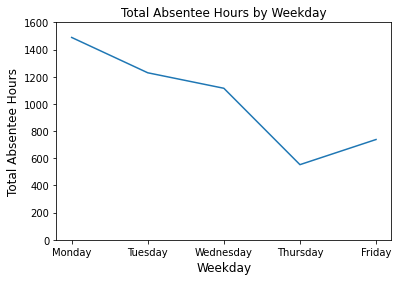

In [71]:
plt.plot(absence_by_weekday.weekday, absence_by_weekday.hrs_absent)
plt.ylim(0, 1600)
plt.xticks([2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Total Absentee Hours by Weekday")
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total Absentee Hours', fontsize=12)

Text(0.5, 1.0, 'Total Absence Events by Weekday')

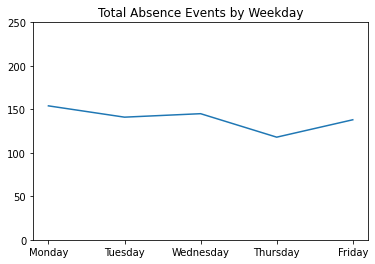

In [72]:
plt.plot(absence_by_weekday.weekday, absence_by_weekday.events)
plt.ylim(0, 250)
plt.xticks([2,3,4,5,6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])
plt.title("Total Absence Events by Weekday")

**Observations:**
Season doesn't play a big role in absence.
March and July have definitive spikes in absences.
Absences are highest on Mondays, decline steadily throughout the week, Thursdays have the lowest absences, then slight rise on Fridays. 

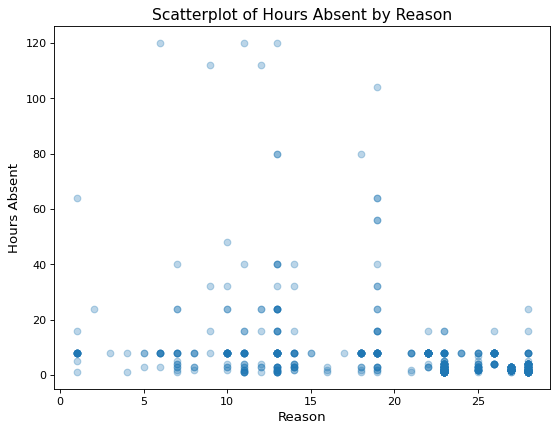

In [73]:
# Change figure size
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)

# Plot events by hrs absent
plt.scatter(df.reason, df.hrs_absent, alpha=0.3)
plt.title('Scatterplot of Hours Absent by Reason', fontsize=14)
plt.xlabel('Reason', fontsize=12)
plt.ylabel('Hours Absent', fontsize=12)
plt.show()

In [74]:
absence_by_reason = df.groupby(by=['reason'], as_index=False)['hrs_absent', 'events'].sum()
absence_by_reason

<ipython-input-74-9e2e61494dac>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  absence_by_reason = df.groupby(by=['reason'], as_index=False)['hrs_absent', 'events'].sum()


,reason,hrs_absent,events
0,1,182,16
1,2,24,1
2,3,8,1
3,4,9,2
4,5,19,3
5,6,171,8
6,7,150,15
7,8,32,6
8,9,168,4
9,10,276,25


Text(0, 0.5, 'Count')

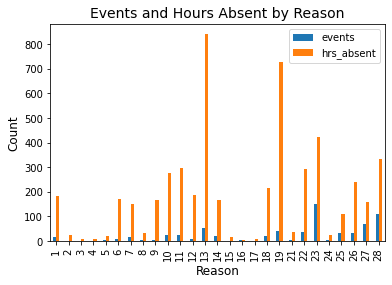

In [75]:
absence_by_reason[["events", "hrs_absent"]].plot(kind="bar")
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], 
           [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28])
plt.title("Events and Hours Absent by Reason", fontsize=14)
plt.xlabel("Reason", fontsize=12)
plt.ylabel("Count", fontsize=12)

In [76]:
top_events = 149 + 112 + 68
total_events = df.events.sum()
top_events_percent = ((top_events / total_events) * 100).round(2)
print(top_events_percent)

47.27


In [77]:
top_hrs_absent = 842 + 729 + 424
total_hrs_absent = df.hrs_absent.sum()
top_hrs_percent = ((top_hrs_absent / total_hrs_absent) * 100).round(2)
print(top_hrs_percent)

38.93


**Observations**

Reasons 23, 27, & 28 account for ~47% of absences. 

Reasons 13, 19, & 23 account for ~39% of absent hours.   

In [78]:
# Look for correlation between the variables
df.corr()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,...,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent,events
id,1.000000,-0.082239,0.001350,0.037993,0.098344,-0.218650,-0.513676,-0.293064,0.025402,0.106659,...,-0.031055,0.010626,-0.469789,0.002811,-0.022132,-0.260797,0.056822,-0.303154,-0.017577,NaN
reason,-0.082239,1.000000,-0.051632,0.139780,-0.049309,-0.082326,0.166834,0.063563,-0.012952,-0.135910,...,-0.102716,-0.015184,0.121221,-0.071135,-0.029914,0.061801,-0.112168,0.116443,-0.300813,NaN
month,0.001350,-0.051632,1.000000,-0.004435,0.396522,0.130296,-0.005061,-0.060860,0.003033,-0.173712,...,-0.059851,0.071349,0.042514,-0.049586,0.074547,0.019318,-0.066579,0.047585,0.033875,NaN
weekday,0.037993,0.139780,-0.004435,1.000000,0.049012,0.035570,0.118194,0.006891,-0.012138,0.018928,...,0.059631,0.103492,0.038277,0.026839,-0.014858,-0.150303,-0.100070,-0.125316,-0.130839,NaN
season,0.098344,-0.049309,0.396522,0.049012,1.000000,0.018140,-0.055463,-0.006818,-0.026869,0.164882,...,0.005660,0.039101,-0.050597,-0.080228,0.021174,-0.034744,-0.036019,-0.017491,0.012429,NaN
trans_expense,-0.218650,-0.082326,0.130296,0.035570,0.018140,1.000000,0.265104,-0.341838,-0.217854,-0.024080,...,-0.058251,0.386831,0.174328,0.007725,0.431546,-0.189025,-0.181332,-0.114765,0.040808,NaN
distance,-0.513676,0.166834,-0.005061,0.118194,-0.055463,0.265104,1.000000,0.143673,-0.134035,-0.066845,...,-0.265459,0.039428,0.485190,-0.089702,0.207687,-0.018504,-0.377127,0.153649,-0.099886,NaN
service_time,-0.293064,0.063563,-0.060860,0.006891,-0.006818,-0.341838,0.143673,1.000000,0.677288,0.018731,...,-0.210558,-0.053415,0.346365,0.091961,-0.469122,0.460969,-0.066743,0.509803,0.019654,NaN
age,0.025402,-0.012952,0.003033,-0.012138,-0.026869,-0.217854,-0.134035,0.677288,1.000000,-0.042212,...,-0.215207,0.061813,0.214618,0.128160,-0.264427,0.404991,-0.093746,0.463033,0.086038,NaN
workload,0.106659,-0.135910,-0.173712,0.018928,0.164882,-0.024080,-0.066845,0.018731,-0.042212,1.000000,...,-0.078196,0.038374,-0.016247,-0.001562,-0.003880,-0.033374,0.109018,-0.090242,0.030206,NaN


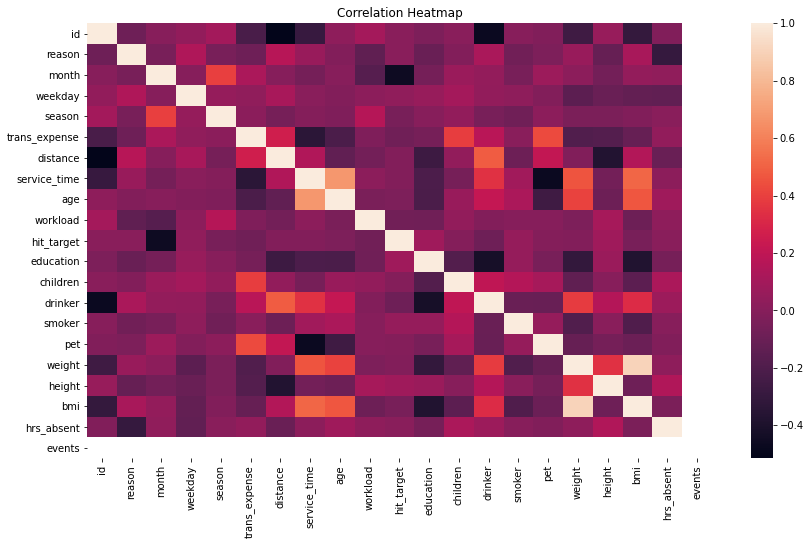

In [79]:
# Use Seaborn to create a correlation heatmap to review for possible relationships
plt.figure(figsize=(14,8))
ax = plt.axes()
sns.heatmap(df.corr(), ax = ax)
ax.set_title('Correlation Heatmap')
plt.show()

In [80]:
# What I'm more interested in though is any correlation the variables might have with the target (hrs_absent)
df.corr()[['hrs_absent']].sort_values(by='hrs_absent', ascending=False)

,hrs_absent
hrs_absent,1.000000
height,0.148394
children,0.127683
age,0.086038
drinker,0.073874
trans_expense,0.040808
month,0.033875
workload,0.030206
weight,0.028102
service_time,0.019654


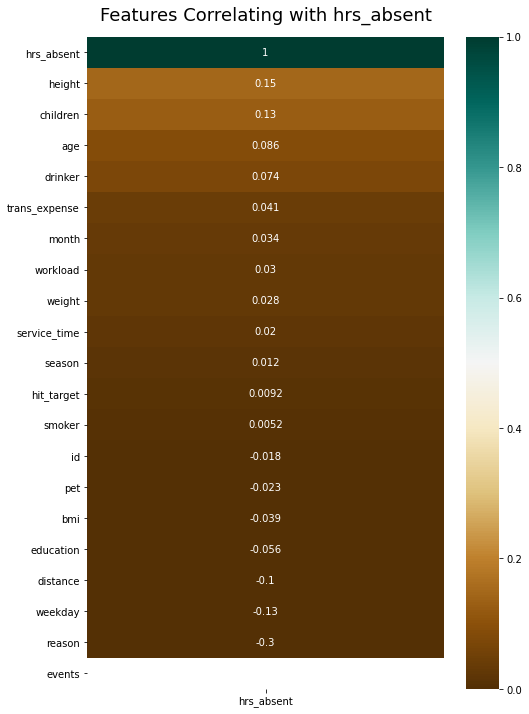

In [81]:
# Plot the information above in a visualization
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['hrs_absent']].sort_values(by='hrs_absent', ascending=False), 
                      vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with hrs_absent', fontdict={'fontsize':18}, pad=16);

In [82]:
# Remove the events column, it was for EDA purposed and is no longer needed.
df = df.drop(['events', 'service_time', 'bmi'], axis=1)

**One-Hot Encode Categorical Data**

In [84]:
# Before splitting data, I want to remove any columns that have information related to the target, to prevent
# introducing bias and overfitting the model. For example: Month. 

df1 = df.drop(['id', 'reason', 'month', 'weekday', 'season'], axis=1)
df1.head()

,trans_expense,distance,age,workload,hit_target,education,children,drinker,smoker,pet,weight,height,hrs_absent
0,289,36,33,239554,97,1,2,1,0,1,198,68,4
2,179,51,38,239554,97,1,0,1,0,0,196,67,2
3,279,5,39,239554,97,1,2,1,1,0,150,66,4
4,289,36,33,239554,97,1,2,1,0,1,198,68,2
5,179,51,38,239554,97,1,0,1,0,0,196,67,2


In [85]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['education'] 

# Use get dummies to one-hot encode the categorical columns
one_hot_data = pd.get_dummies(df1, columns = categorical_cols)

In [86]:
# Move the target (hrs_absent) column to the last column
df2 = one_hot_data[[c for c in one_hot_data if c not in ['hrs_absent']] 
       + ['hrs_absent']]
df2.head()

,trans_expense,distance,age,workload,hit_target,children,drinker,smoker,pet,weight,height,education_1,education_2,education_3,education_4,hrs_absent
0,289,36,33,239554,97,2,1,0,1,198,68,1,0,0,0,4
2,179,51,38,239554,97,0,1,0,0,196,67,1,0,0,0,2
3,279,5,39,239554,97,2,1,1,0,150,66,1,0,0,0,4
4,289,36,33,239554,97,2,1,0,1,198,68,1,0,0,0,2
5,179,51,38,239554,97,0,1,0,0,196,67,1,0,0,0,2


**Train-Test Split Data**

In [87]:
# Train Test Split
from sklearn.model_selection import train_test_split

# split the data into training and test datasets with no target variable to prepare for clustering
train_data, test_data = train_test_split(df2, train_size=0.70, random_state=11)

In [88]:
# number of samples in each set
print("No. of samples in training set: ", train_data.shape[0])
print("No. of samples in validation set:", test_data.shape[0])

No. of samples in training set:  487
No. of samples in validation set: 209


**Normalize Data**
Use Min/Max Scaler because it suppresses the effect of outliers and normalizes across features, since I have features that 
have vastly different scales. 

In [89]:
# Min/Max Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [90]:
# Convert the arrays back to a dataframe
train_data2 = pd.DataFrame(train_data_scaled)

In [91]:
# Convert the arrays back to a dataframe
test_data2 = pd.DataFrame(test_data_scaled)

In [92]:
# Split training data into features and target data
X_train = train_data2.iloc[: , :-1]
y_train = train_data2.iloc[:,-1:]

In [93]:
# Split test data into features and target data
X_val = test_data2.iloc[: , :-1]
y_val = test_data2.iloc[:,-1:]

**Feature Selection**

**Correlation Feature Selection Method**

In [94]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Measure the correlation statistic using the f_regression function of SelectKBest
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')

# learn relationship from training data
fs.fit(X_train, y_train.values.ravel())

SelectKBest(k='all', score_func=<function f_regression at 0x000002A2799A4AF0>)

In [95]:
# View the scores for the features. The higher the better.
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 3.864508
Feature 1: 4.293535
Feature 2: 3.364315
Feature 3: 0.027981
Feature 4: 0.012946
Feature 5: 9.824724
Feature 6: 0.711733
Feature 7: 0.003932
Feature 8: 0.000598
Feature 9: 0.194999
Feature 10: 6.494373
Feature 11: 0.459905
Feature 12: 0.090005
Feature 13: 0.958801
Feature 14: 0.031238


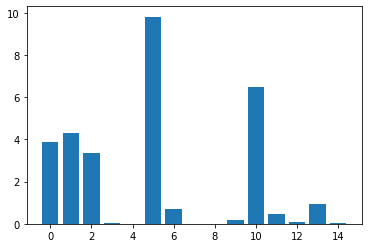

In [96]:
# plot the scores to get a visual idea of how many features to select
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [98]:
# After reviewing the results, decide on a good number of features to select to use during modeling.
fs = SelectKBest(score_func=f_regression, k=5)

# learn relationship from training data
fs.fit(X_train, y_train.values.ravel())

# transform train input data
X_train_fs = fs.transform(X_train)

# transform test input data
X_test_fs = fs.transform(X_val)

**Mutual Information Feature Selection Method**

In [101]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

# Use mutual information as a methond of scoring feature selection with SelectKBest
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k='all')

# learn relationship from training data
fs.fit(X_train, y_train.values.ravel())

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x000002D42598B790>)

In [102]:
# View the scores for the features. The higher the better.
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 0.128441
Feature 1: 0.129140
Feature 2: 0.163332
Feature 3: 0.108778
Feature 4: 0.133138
Feature 5: 0.007630
Feature 6: 0.004428
Feature 7: 0.099061
Feature 8: 0.037150
Feature 9: 0.000000
Feature 10: 0.060757
Feature 11: 0.130834
Feature 12: 0.112980
Feature 13: 0.123924
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.000000
Feature 17: 0.000000


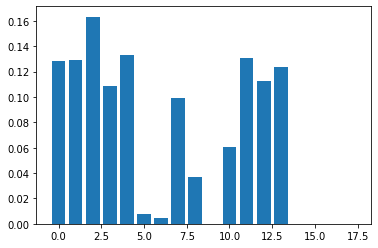

In [103]:
# plot the scores to get a visual idea of how many features to select
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [104]:
# Use mutual information as a methond of scoring feature selection with SelectKBest
# configure to select all features
fs = SelectKBest(score_func=mutual_info_regression, k=9)

# learn relationship from training data
fs.fit(X_train, y_train.values.ravel())

# transform train input data
X_train_fs = fs.transform(X_train)

# transform test input data
X_test_fs = fs.transform(X_val)

**Decision Tree Feature Selection Method**

In [106]:
# Take df2 and split into features/target because during decision tree feature selection, you use the whole dataset 
# and the dataset does not need to be normalized.
features = df2.iloc[: , :-1]
target = df2.iloc[:,-1:]

In [107]:
# Use RandomForestClassifier for feature selection because the dataset contains both numeric and categorical features
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Specify random forest instance, indicating the number of trees
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))

# Use selectFromModel object to automatically select features
sel.fit(features, target.values.ravel())

# Make a list and count the selected features
selected_feat= features.columns[(sel.get_support())]

print("Best Number of Features: ", len(selected_feat))
print("List of Feature Names: ", selected_feat)

Best Number of Features:  2
List of Feature Names:  Index(['workload', 'hit_target'], dtype='object')


In [108]:
# Create a features dataframe that has the identified best features
best_features = features[['workload', 'hit_target', 'discipline_fail']]
best_features

,workload,hit_target,discipline_fail
0,239554,97,0
2,239554,97,0
3,239554,97,0
4,239554,97,0
5,239554,97,0
...,...,...,...
732,264604,93,0
733,264604,93,0
734,264604,93,0
735,264604,93,0


In [109]:
# reset index
best_features.reset_index(inplace=True, drop=True)

In [110]:
# Combine best features and target back into one dataset
best_data = pd.concat([best_features, target], axis=1, join='inner')
best_data.head()

,workload,hit_target,discipline_fail,hrs_absent
0,239554,97,0,4
2,239554,97,0,2
3,239554,97,0,4
4,239554,97,0,2
5,239554,97,0,2


In [111]:
# Train Test Split
from sklearn.model_selection import train_test_split

# split the data into training and test datasets with no target variable to prepare for clustering
train_data, test_data = train_test_split(best_data, train_size=0.70, random_state=11)

In [112]:
# Min/Max Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [113]:
# Convert the arrays back to a dataframe
dt_train = pd.DataFrame(train_data_scaled)

In [114]:
# Convert the arrays back to a dataframe
dt_test = pd.DataFrame(test_data_scaled)

In [115]:
# Split training data into features and target data
X_train = dt_train.iloc[: , :-1]
y_train = dt_train.iloc[:,-1:]

In [116]:
# Split test data into features and target data
X_val = dt_test.iloc[: , :-1]
y_val = dt_test.iloc[:,-1:]

** Linear Model**

Use Linear regression because this is a regression problem, where I am trying to predict the target (hrs_absent) using personal
demographic information from the employees. 
1. Baseline Regression Model
2. Linear regression with all features
3. Linear regression using features by correlation feature selection method
4. Linear regression using mutual information feature selection method
5. Linear regression using decision tree feature selection method

In [100]:
# Import libraries for linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.dummy import DummyRegressor
import math

In [102]:
# 1. Baseline Regression Model
# fit the model
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, y_train)

print('R2:', dummy.score(X_val, y_val))

R2: -3.2759498994838765e-05


In [103]:
# 2. Linear regression with all features
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.057
RMSE: 0.122
R2: 0.027230661438291004


In [104]:
# 3. Linear regression using features by correlation method
# Make sure to run Correlation Feature Selection section first

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_test_fs, y_val))

MAE: 0.055
RMSE: 0.121
R2: 0.04294893260559385


In [105]:
# 4. Linear regression using mutual information method
# Make sure to run Mutual Information Feature Selection section first

# fit the model
model = LinearRegression()
model.fit(X_train_fs, y_train)

# evaluate the model
yhat = model.predict(X_test_fs)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_test_fs, y_val))

MAE: 0.056
RMSE: 0.122
R2: 0.03203558882363822


In [117]:
# 5. Linear regression using decision tree feature selection method
# Make sure to run Decision Tree Feature Selection section first

# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.059
RMSE: 0.137
R2: -0.012049371524061714


**Observations**

The lower the MAE and RMSE, the better. Used to compare model performance against one another. 
R2 is the percentage of dependant variability that can be explained by the model. 
When looking at the performance scores for the above 5 models. I would say that the linear model using all variables scored the best overall and is better than the baseline model, however not by much.  

**Decision Tree Regression Model**

In [105]:
# Import Libraries
from sklearn.tree import DecisionTreeRegressor

In [106]:
# Create decision tree classifier object
decisiontree = DecisionTreeRegressor(random_state=0)

In [107]:
# Train model
model = decisiontree.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.071
RMSE: 0.183
R2: -1.1981154484570626


In [108]:
# Create decision tree classifier object using entropy
decisiontree_mae = DecisionTreeRegressor(criterion='mae', random_state=0)

In [109]:
# Train model
model_mae = decisiontree_mae.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.071
RMSE: 0.183
R2: -1.1981154484570626


**Random Forest Regressor Model**

In [110]:
# Import Libraries
from sklearn.ensemble import RandomForestRegressor

In [111]:
# Create Random Forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1)

In [112]:
# Train model
model = randomforest.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.060
RMSE: 0.140
R2: -0.2759488223048516


<ipython-input-112-e24d483666b0>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = randomforest.fit(X_train, y_train)


**Run Linear Regression Model with Reason Included**
But HIPAA Privacy Prevents this from being used.

In [153]:
by_reason = df.drop(['id', 'month', 'weekday', 'season'], axis=1)

In [154]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['reason','education'] 

# Use get dummies to one-hot encode the categorical columns
one_hot_data = pd.get_dummies(by_reason, columns = categorical_cols)

In [155]:
# Move the target (hrs_absent) column to the last column
reason2 = one_hot_data[[c for c in one_hot_data if c not in ['hrs_absent']] 
       + ['hrs_absent']]

In [156]:
# Train Test Split
from sklearn.model_selection import train_test_split

# split the data into training and test datasets with no target variable to prepare for clustering
train_data, test_data = train_test_split(reason2, train_size=0.70, random_state=11)

In [157]:
# Min/Max Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [158]:
# Convert the arrays back to a dataframe
train_data2 = pd.DataFrame(train_data_scaled)

In [159]:
# Convert the arrays back to a dataframe
test_data2 = pd.DataFrame(test_data_scaled)

In [160]:
# Split training data into features and target data
X_train = train_data2.iloc[: , :-1]
y_train = train_data2.iloc[:,-1:]

In [161]:
# Split test data into features and target data
X_val = test_data2.iloc[: , :-1]
y_val = test_data2.iloc[:,-1:]

In [162]:
# 2. Linear regression with all features
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.047
RMSE: 0.099
R2: 0.08763022919960695


**Linear Regression with month**

In [187]:
employee_by_month = df.drop(['id', 'reason', 'weekday', 'season'], axis=1)

In [198]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['education'] 

# Use get dummies to one-hot encode the categorical columns
one_hot_data = pd.get_dummies(employee_by_month, columns = categorical_cols)

In [199]:
# Move the target (hrs_absent) column to the last column
reason3 = one_hot_data[[c for c in one_hot_data if c not in ['hrs_absent']] 
       + ['hrs_absent']]

In [200]:
# Train Test Split
from sklearn.model_selection import train_test_split

# split the data into training and test datasets with no target variable to prepare for clustering
train_data, test_data = train_test_split(reason3, train_size=0.70, random_state=11)

In [201]:
# Min/Max Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

In [202]:
# Convert the arrays back to a dataframe
train_data2 = pd.DataFrame(train_data_scaled)

In [203]:
# Convert the arrays back to a dataframe
test_data2 = pd.DataFrame(test_data_scaled)

In [204]:
# Split training data into features and target data
X_train = train_data2.iloc[: , :-1]
y_train = train_data2.iloc[:,-1:]

In [205]:
# Split test data into features and target data
X_val = test_data2.iloc[: , :-1]
y_val = test_data2.iloc[:,-1:]

In [206]:
# 2. Linear regression with all features
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# evaluate the model
yhat = model.predict(X_val)

# evaluate predictions
mae = mean_absolute_error(y_val, yhat)
print('MAE: %.3f' % mae)

mse = mean_squared_error(y_val, yhat)
rmse = math.sqrt(mse)
print('RMSE: %.3f' % rmse)

print('R2:', model.score(X_val, y_val))

MAE: 0.049
RMSE: 0.103
R2: 0.02111131816391032


**Cross-validate Linear Regression model**

In [149]:
# Min/Max Scale data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1)) 
scaled_data = scaler.fit_transform(df2)

In [151]:
# Convert the array back to a dataframe
whole_set = pd.DataFrame(scaled_data)

In [152]:
# Take df2 and split into features/target because during decision tree feature selection, you use the whole dataset 
# and the dataset does not need to be normalized.
features = whole_set.iloc[: , :-1]
target = whole_set.iloc[:,-1:]

In [153]:
# The linear regression model using correlation feature selection scored the best
from sklearn.model_selection import cross_val_score
model = LinearRegression()
scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
scores

array([-0.0062963 , -0.01063054, -0.01650549, -0.01103774, -0.02307885])

In [154]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
scores

array([-0.05245049,  0.07113089,  0.01057214, -0.08961268, -0.31863819])

**Clustering**
I think I would have to separate the hrs_absent (target) in classes, then view feature values for those classes.?
hrs_absent per event = min 0, max 120
Classes of absence events: 
4 - Extended = (56-120), 8+ days (example: Extreme illness, like cancer, or major surgery)
3 - Long (25-56), 4 to 7 days (example: minor surgery and recovery time)
2 - Mid (5-24), more than half a day and up to 3 days (example: flu)
1 - Short = (0-4), up to half a day (example: Routine medical/dental appts)

In [171]:
# separate the hrs_absent (target) in classes
df['absence_type'] = pd.cut(df.hrs_absent,bins=[0,4,24,56,120],labels=[1, 2, 3, 4])
#df.insert('absence_type')
df.head()

,id,reason,month,weekday,season,trans_expense,distance,service_time,age,workload,...,education,children,drinker,smoker,pet,weight,height,bmi,hrs_absent,absence_type
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,198,68,30,4,1
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,196,67,31,2,1
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,150,66,24,4,1
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,198,68,30,2,1
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,196,67,31,2,1


In [172]:
# Just realized there are rows without a target value
df['absence_type'].isnull().sum()

0

In [173]:
# Look how the dataset breaks up in those classes
df['absence_type'].value_counts(normalize=True)

1    0.599138
2    0.360632
3    0.022989
4    0.017241
Name: absence_type, dtype: float64

In [174]:
cluster_df = df.drop(['id', 'reason', 'month', 'weekday', 'season', 'hrs_absent'], axis=1)
cluster_df.head()

,trans_expense,distance,service_time,age,workload,hit_target,discipline_fail,education,children,drinker,smoker,pet,weight,height,bmi,absence_type
0,289,36,13,33,239554,97,0,1,2,1,0,1,198,68,30,1
2,179,51,18,38,239554,97,0,1,0,1,0,0,196,67,31,1
3,279,5,14,39,239554,97,0,1,2,1,1,0,150,66,24,1
4,289,36,13,33,239554,97,0,1,2,1,0,1,198,68,30,1
5,179,51,18,38,239554,97,0,1,0,1,0,0,196,67,31,1


In [175]:
# Change categorical features to numerical values
#categorical data
categorical_cols = ['education'] 

# Use get dummies to one-hot encode the categorical columns
cluster = pd.get_dummies(cluster_df, columns = categorical_cols)

In [176]:
# Move the target (hrs_absent) column to the last column
cluster2 = cluster[[c for c in cluster if c not in ['absence_type']] 
       + ['absence_type']]
cluster2.head()

,trans_expense,distance,service_time,age,workload,hit_target,discipline_fail,children,drinker,smoker,pet,weight,height,bmi,education_1,education_2,education_3,education_4,absence_type
0,289,36,13,33,239554,97,0,2,1,0,1,198,68,30,1,0,0,0,1
2,179,51,18,38,239554,97,0,0,1,0,0,196,67,31,1,0,0,0,1
3,279,5,14,39,239554,97,0,2,1,1,0,150,66,24,1,0,0,0,1
4,289,36,13,33,239554,97,0,2,1,0,1,198,68,30,1,0,0,0,1
5,179,51,18,38,239554,97,0,0,1,0,0,196,67,31,1,0,0,0,1


In [177]:
# Split training data into features and target data
features = cluster2.iloc[: , :-1]
target = cluster2.iloc[:,-1:]

In [178]:
# Create cluster object and train model
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize features
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

# Create k-mean object
cluster = KMeans(n_clusters=4, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(features_std)

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [182]:
# View predict class
target_predicted = model.labels_
target_predicted

array([2, 0, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 0, 3, 0, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2,
       1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 0, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 3, 2, 2, 1, 2, 1, 2, 1, 3, 1, 2, 0,
       1, 2, 2, 0, 1, 0, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0,
       2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 2, 3, 2, 2, 1,
       0, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 0, 1,
       2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       0, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 1, 0, 0, 2,
       0, 0, 1, 2, 0, 1, 1, 3, 1, 2, 3, 3, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 3, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 2, 2, 0, 1,

In [181]:
# View true class
target_list = target['absence_type'].tolist()
print(f"\ntarget_list:\n{target_list}\ntype:{type(target_list)}")


target_list:
[1, 1, 1, 1, 1, 2, 1, 3, 2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 3, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 3, 2, 3, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 4, 1, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 3, 3, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 4, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 1, 1, 3, 2, 2, 1, 2, 2, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1

In [185]:
# Evaluate cluster model
from sklearn.metrics import silhouette_score
silhouette_score(features_std, target_predicted)

0.2268971400301785

**Clustering using the preprocessed dataset**

In [186]:
# Create cluster object and train model
from sklearn.cluster import KMeans

# Create k-mean object
cluster = KMeans(n_clusters=4, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(X_train)

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [187]:
# View predict class
target_predicted = model.labels_
target_predicted

array([2, 0, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 3, 2, 2, 0, 0,
       2, 2, 0, 0, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 0, 0, 1, 3, 0, 2, 0, 0, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 2, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 2, 0, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 3, 0, 3, 2, 2, 0,
       0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 3, 3, 1, 1, 2, 0, 2, 0, 3, 3,
       0, 2, 0, 3, 0, 2, 2, 2, 2, 0, 3, 2, 0, 0, 0, 2, 0, 3, 0, 0, 0, 2,
       1, 0, 0, 0, 3, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 1, 2, 3, 0, 2,
       2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 3, 2, 0, 0, 2, 0, 2,
       0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 2, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       3, 0, 2, 3, 0, 1, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1,
       3, 0, 2, 2, 0, 0, 1, 3, 3, 2, 0, 2, 0, 0, 2,

In [190]:
# Evaluate cluster model
from sklearn.metrics import silhouette_score
silhouette_score(X_train, target_predicted)

0.3749448278382779

In [191]:
from sklearn.metrics import make_scorer, r2_score

# Evaluate model with test data
test_target_predicted = model.predict(X_val)

# Calculate r-squared score
r2_score(y_val, test_target_predicted)

-122.13010875773774